# Fraud prediction model

in this notebook , i worked with XGBoost model and analyse the data to get best performance to my model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
print('train data shape :',train_data.shape)
print('test data shape :',test_data.shape)

train data shape : (1296675, 23)
test data shape : (555719, 23)


In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df = pd.concat([train_data,test_data])
df.shape

(1852394, 23)

<Axes: xlabel='is_fraud'>

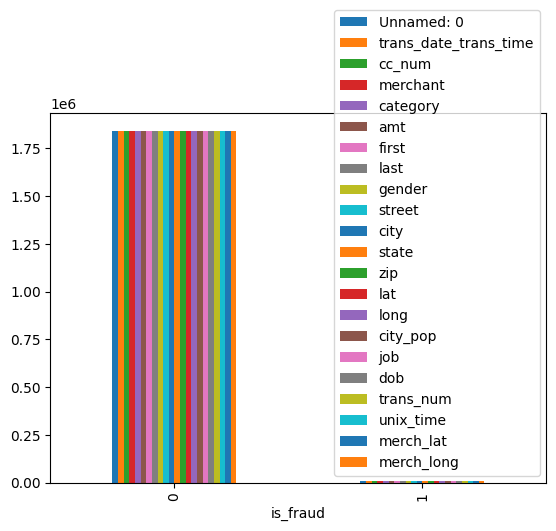

In [6]:
import seaborn as sns
import matplotlib as plt
df.groupby('is_fraud').count().plot.bar()

In [7]:
fraud = df[df['is_fraud'] == 1]
non_fraud = df[df['is_fraud'] == 0]
print(len(fraud), len(non_fraud))

9651 1842743


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Perparation

In [10]:
df_balanced = pd.concat([fraud, non_fraud.sample(len(fraud))])
df.shape

(1852394, 23)

<Axes: xlabel='is_fraud'>

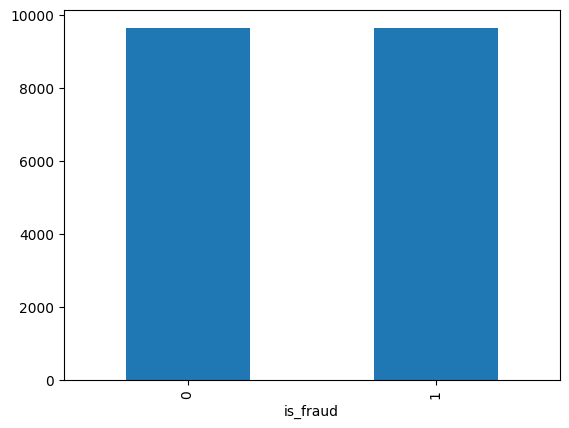

In [11]:
df_balanced.groupby('is_fraud').count()['cc_num'].plot.bar()

In [12]:
#dropping columns has no relation to the target
columns_dropped = ['Unnamed: 0',
                   'merchant', 
                   'cc_num',
                   'first', 
                   'last',
                   'gender',
                   'trans_num',
                   'unix_time',
                   'street',
                   'merch_lat',
                   'merch_long',
                   'job',
                   'zip',
                   ]

df_balanced.drop(columns = columns_dropped, inplace = True)

In [13]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 50951
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  19302 non-null  object 
 1   category               19302 non-null  object 
 2   amt                    19302 non-null  float64
 3   city                   19302 non-null  object 
 4   state                  19302 non-null  object 
 5   lat                    19302 non-null  float64
 6   long                   19302 non-null  float64
 7   city_pop               19302 non-null  int64  
 8   dob                    19302 non-null  object 
 9   is_fraud               19302 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.6+ MB


In [14]:
df_balanced.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,2019-01-02 01:06:37,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,2019-01-02 01:47:29,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,2019-01-02 03:05:23,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,2019-01-02 03:38:03,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,2019-01-02 03:55:47,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [15]:
df_balanced['trans_date_trans_time'] = pd.to_datetime(df_balanced['trans_date_trans_time'])
df_balanced['dob'] = pd.to_datetime(df_balanced['dob'])

In [16]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 50951
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  19302 non-null  datetime64[ns]
 1   category               19302 non-null  object        
 2   amt                    19302 non-null  float64       
 3   city                   19302 non-null  object        
 4   state                  19302 non-null  object        
 5   lat                    19302 non-null  float64       
 6   long                   19302 non-null  float64       
 7   city_pop               19302 non-null  int64         
 8   dob                    19302 non-null  datetime64[ns]
 9   is_fraud               19302 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [17]:
df_balanced['trans_date_trans_time'] = df_balanced['trans_date_trans_time'].dt.hour

In [18]:
df_balanced = df_balanced.rename(columns = {'trans_date_trans_time': 'hour_transaction'})

In [19]:
def get_tod(hour):
    if 4 < hour['hour_transaction'] <= 12:
        ans = 'morning'
    elif 12 < hour['hour_transaction'] <= 20:
        ans = 'afternoon'
    elif hour['hour_transaction'] <= 4 or hour['hour_transaction'] > 20:
        ans = 'night'
    return ans

In [20]:
df_balanced['hour_transaction'] = df_balanced.apply(get_tod, axis = 1)

In [21]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,night,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,night,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,night,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,night,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,night,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [22]:
from datetime import datetime
df_balanced['dob']= df_balanced['dob'].dt.year
df_balanced = df_balanced.rename(columns = {'dob': 'age'})
df_balanced['age'] = datetime.now().year - df_balanced['age']

In [23]:
df_balanced[df_balanced['is_fraud'] == 1].groupby('age').count()['is_fraud']

age
19      7
20     32
21     21
22     12
23     58
       ..
96     41
97     54
98     33
99     11
100     7
Name: is_fraud, Length: 82, dtype: int64

In [24]:
NUMERICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'int64'\
                      or df_balanced[i].dtype =='int32' \
                      or df_balanced[i].dtype =='float64']
CATEGORICAL_FEATURES = [i for i in df_balanced.columns if df_balanced[i].dtype == 'object']

In [25]:
NUMERICAL_FEATURES

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']

In [26]:
CATEGORICAL_FEATURES

['hour_transaction', 'category', 'city', 'state']

In [27]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(df_balanced[CATEGORICAL_FEATURES])

df_balanced[CATEGORICAL_FEATURES] = encoder.transform(df_balanced[CATEGORICAL_FEATURES])

In [29]:
df_balanced.head()

,hour_transaction,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2.0,4.0,281.06,165.0,27.0,35.9946,-81.7266,885,36,1
2472,2.0,2.0,11.52,733.0,43.0,29.4400,-98.4590,1595797,64,1
2523,2.0,4.0,276.31,733.0,43.0,29.4400,-98.4590,1595797,64,1
2546,2.0,2.0,7.03,165.0,27.0,35.9946,-81.7266,885,36,1
2553,2.0,4.0,275.73,733.0,43.0,29.4400,-98.4590,1595797,64,1


In [30]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 50951
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour_transaction  19302 non-null  float64
 1   category          19302 non-null  float64
 2   amt               19302 non-null  float64
 3   city              19302 non-null  float64
 4   state             19302 non-null  float64
 5   lat               19302 non-null  float64
 6   long              19302 non-null  float64
 7   city_pop          19302 non-null  int64  
 8   age               19302 non-null  int32  
 9   is_fraud          19302 non-null  int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 1.5 MB


In [31]:
df_balanced[['is_fraud', 'age']] = df_balanced[['is_fraud', 'age']].astype('float64')

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_balanced)
df_scaled = pd.DataFrame(df_scaled)

In [33]:
last_column = df_scaled.shape[1]-1

In [34]:
print(f"Not fraud: {df_scaled[df_scaled[last_column] == 0].count()[last_column]}")
print(f"Fraud: {df_scaled[df_scaled[last_column] == 1].count()[last_column]}")

Not fraud: 9651
Fraud: 9651


In [35]:
df_scaled.rename(columns={last_column: 'is_fraud'}, inplace=True)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,is_fraud
0,1.0,0.307692,0.077105,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
1,1.0,0.153846,0.002896,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
2,1.0,0.307692,0.075798,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0
3,1.0,0.153846,0.001660,0.182320,0.54,0.342164,0.859026,0.000297,0.209877,1.0
4,1.0,0.307692,0.075638,0.809945,0.86,0.201707,0.687801,0.549003,0.555556,1.0


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [38]:
X = df_scaled.drop(columns = 'is_fraud')
y = df_scaled['is_fraud']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred = xgb.predict(x_test)

In [44]:
accuracy_test = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", accuracy_test)
print("Test Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Test Accuracy: 0.9717689717689718
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1932
         1.0       0.97      0.98      0.97      1929

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861

